In [1]:
from morphology import *
from itkwidgets import view
import pyvista as pv

In [2]:
path = r"C:\Users\admin\bric-morphology\studies\1\data\new_label.nii"
d = run1(path)

invalid value encountered in true_divide


In [3]:
d

Curvature:
Describe:
Gaussian curvature: DescribeResult(nobs=33080, minmax=(-0.9270143360564338, 0.6925650461813694), mean=0.0009265608751267668, variance=0.0003151361172668633, skewness=-0.6824177935583409, kurtosis=641.4849550540418)
Mean Curvature: DescribeResult(nobs=33080, minmax=(-11.164933261689304, 2.003530887745582), mean=-0.036393610413788746, variance=0.0236023324140626, skewness=-24.875449437098716, kurtosis=1633.0628832694638)
Principal Curvature Min: DescribeResult(nobs=33080, minmax=(-22.327445835902942, 0.37421253142722244), mean=-0.11695391848508851, variance=0.06493465945898032, skewness=-44.26264848499041, kurtosis=3413.0056149959087)
Principal Curvature Max: DescribeResult(nobs=33080, minmax=(-0.4369593795897452, 4.007055976002169), mean=0.04681478338865683, variance=0.01672903713831578, skewness=6.900912087097542, kurtosis=111.60819329258808)
Shapes:
Gaussian curvature: (33080,)
Mean Curvature: (33080,)
Principal Curvature Min: (33080,)
Principal Curvature Max: (33

In [4]:
img = nib.load(path)
mri_3d_voxels = img.get_fdata()
mri_3d_voxels[mri_3d_voxels > 0] = 255

n = d.isosurface.verts.shape[0]
faces_rows = d.isosurface.faces.shape[0]
faces = np.column_stack([3*np.ones((faces_rows,1),dtype=np.int),d.isosurface.faces])
vertices = d.isosurface.verts
faces_count = np.prod(faces.shape)
faces1 = faces.flatten()[0:faces_count]
vertices, faces
curvedness_surf = pv.PolyData(vertices, faces1)
curvedness_surf.point_arrays['curvedness'] = d.surface_measures.curvedness

shape_index_surf = pv.PolyData(vertices, faces1)
shape_index_surf.point_arrays['shape_index'] = d.surface_measures.shape_index

sharpness_surf = pv.PolyData(vertices, faces1)
sharpness_surf.point_arrays['sharpness'] = d.surface_measures.sharpness

total_curvature_surf = pv.PolyData(vertices, faces1)
total_curvature_surf.point_arrays['total_curvature'] = d.surface_measures.total_curvature

point_cloud = pv.PolyData(vertices)

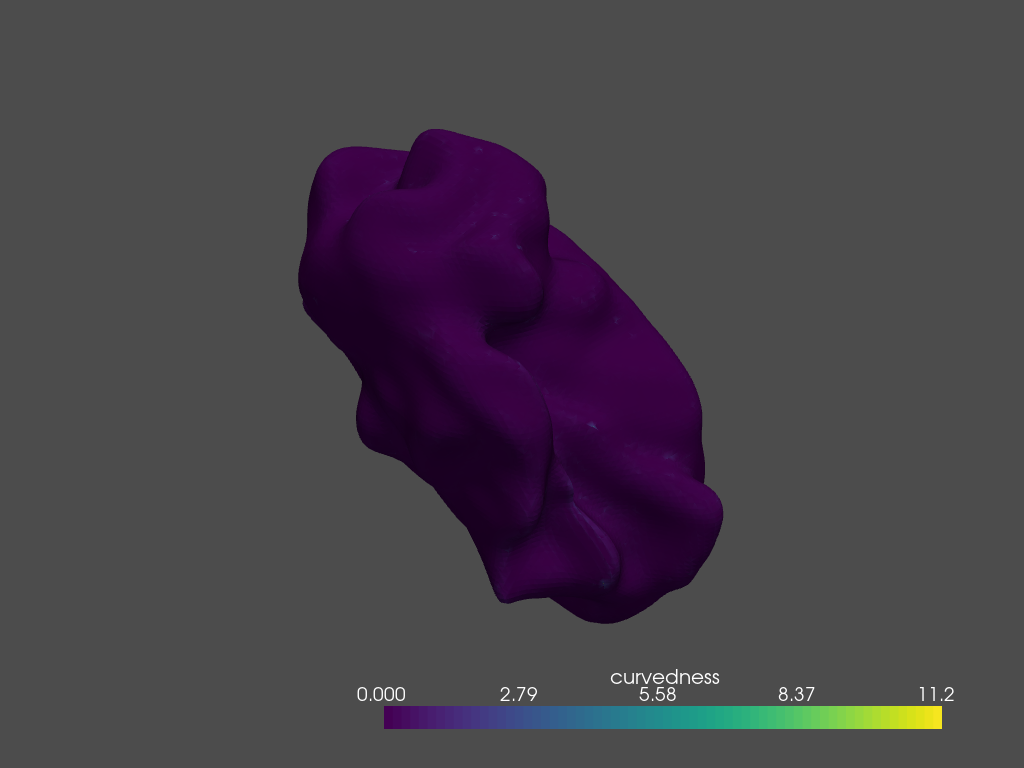

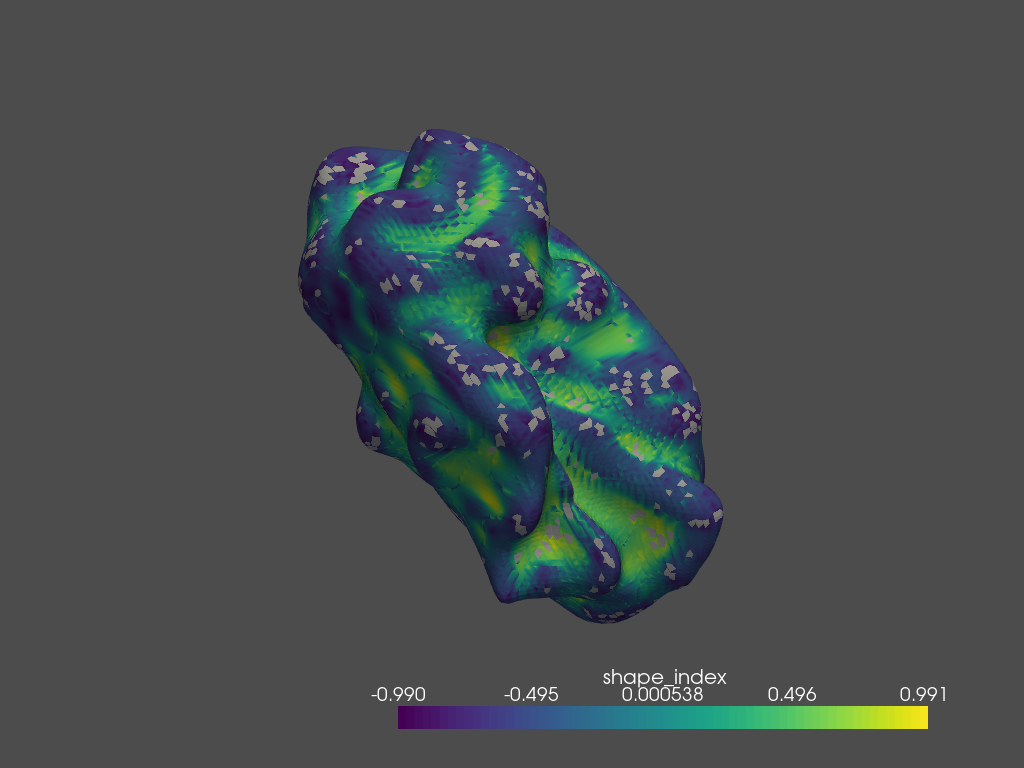

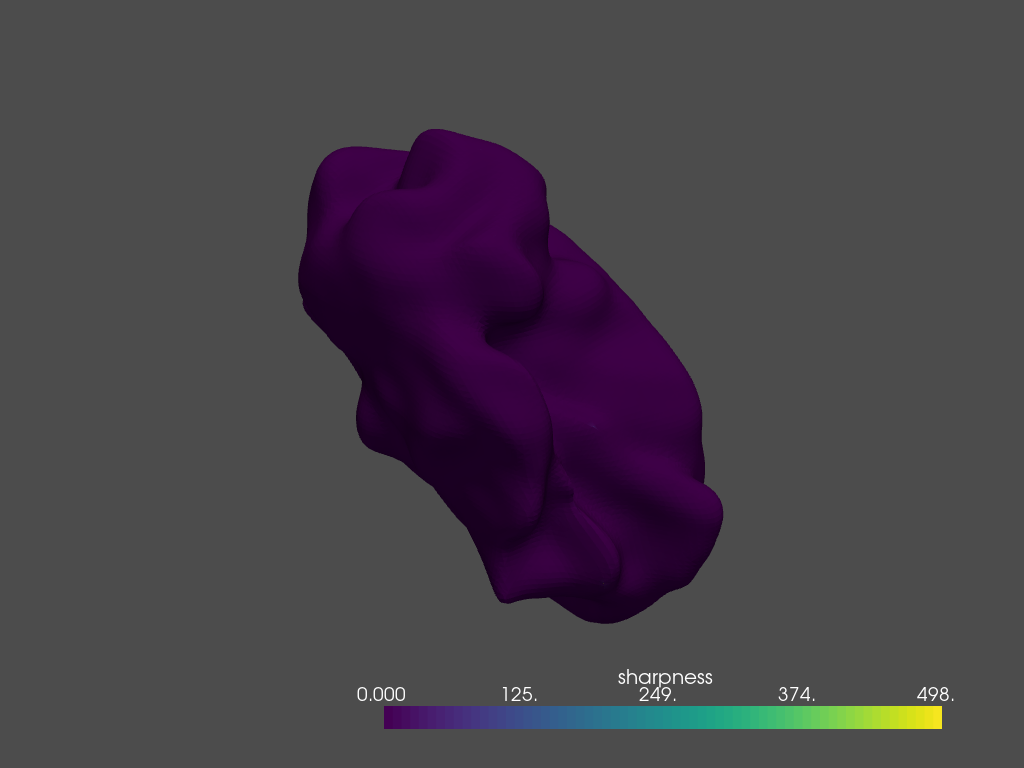

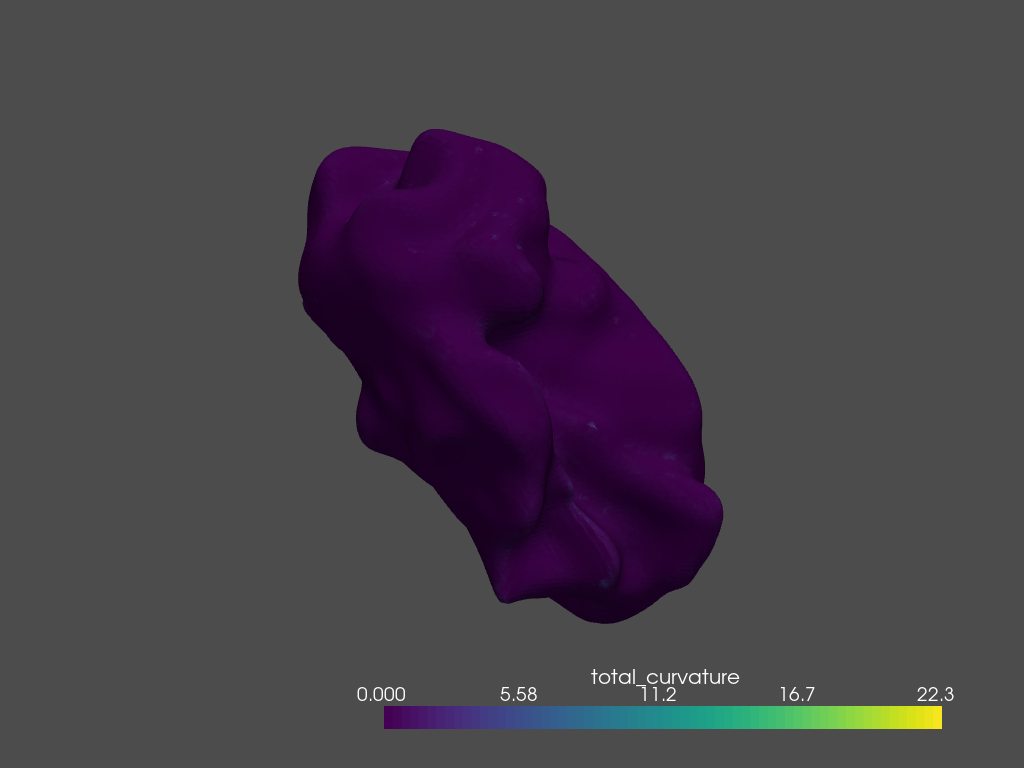

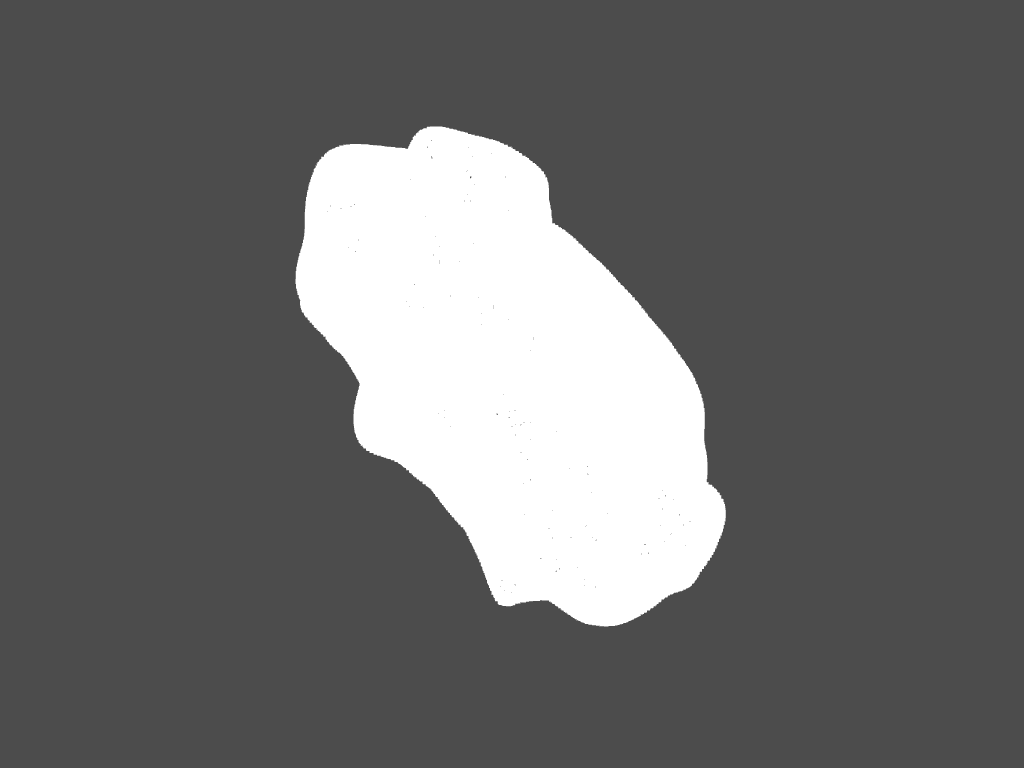

In [5]:
surfaces = [curvedness_surf, shape_index_surf, sharpness_surf, total_curvature_surf, point_cloud]
names    = ["curvedness", "shape index", "sharpness", "total_curvature", "point cloud" ]
for name,graph in zip(names,surfaces):
    graph.plot()
#     slices = graph.slice_orthogonal(x=0, y=0, z=0)
#     slices.plot()
    
geometries = dict(zip(names,surfaces))

IntSlider(value=-54, description='X', max=-54, min=-150)

IntSlider(value=22, description='Y', max=86, min=22)

IntSlider(value=36, description='Z', max=138, min=36)

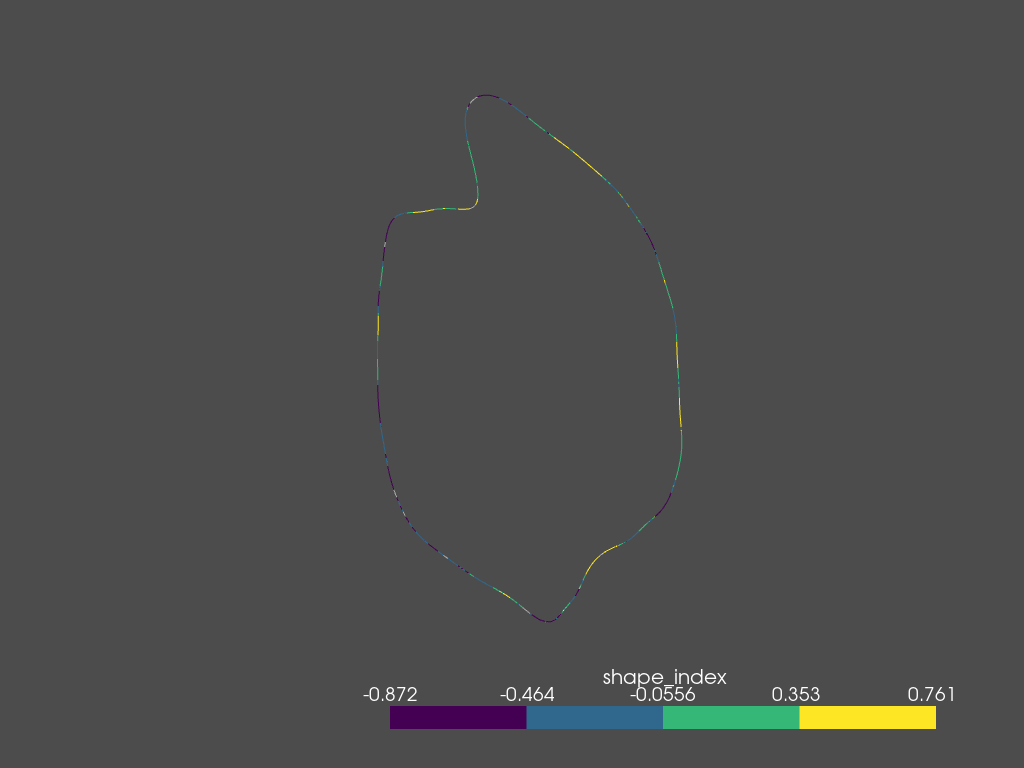

In [14]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
cmap = plt.cm.get_cmap("viridis", 4)


x_min,x_max,y_min,y_max,z_min,z_max = shape_index_surf.bounds

x_slider = widgets.IntSlider(description='X',min=x_min, max=x_max)
y_slider = widgets.IntSlider(description='Y',min=y_min, max=y_max)
z_slider = widgets.IntSlider(description='Z',min=z_min, max=z_max)
display(x_slider)
display(y_slider)
display(z_slider)

slices = shape_index_surf.slice([1, 0, 0])


def on_value_change(change):
    print(change)
    slices = shape_index_surf.slice(
        [x_slider.value, y_slider.value, z_slider.value]
    )
    #slices.plot(cmap=cmap)

x_slider.observe(on_value_change, names='value')        
slices.plot(cmap=cmap)




In [7]:
shape_index_surf.rotate_z(90)
center = shape_index_surf.center
shape_index_surf.translate[0,0,0]

TypeError: 'method' object is not subscriptable

In [ ]:
shape_index_surf.rotate_x(-90)

In [16]:

view(mri_3d_voxels, geometries=[shape_index_surf],axes=True)

Viewer(axes=True, geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points…

In [ ]:
import pyvista as pv
pv.close_all()

p = pv.Plotter()

p.add_volume(mri_3d_voxels)

#p.show(auto_close=False, use_panel=True)
disp = p.show(interactive=True,use_panel=False,auto_close=False)
from IPython.display import display
display(disp)
pv.Report()

In [8]:
import pyvista as pv
pv = pv.PlotterITK()
pv.add_mesh(curvedness_surf)
pv.add_mesh(shape_index_surf)
pv.show(True)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [32]:
pv.show?

In [9]:
mri_3d_voxels

memmap([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [10]:

number_of_points = 3000

gaussian_1_mean = [0.0, 0.0, 0.0]
gaussian_1_cov = [[1.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 0.5]]
point_set_1 = np.random.multivariate_normal(gaussian_1_mean, gaussian_1_cov,
        number_of_points)

gaussian_2_mean = [4.0, 6.0, 7.0]
gaussian_2_cov = [[2.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 1.5]]
point_set_2 = np.random.multivariate_normal(gaussian_2_mean, gaussian_2_cov,
        number_of_points)

gaussian_3_mean = [4.0, 0.0, 7.0]
gaussian_3_cov = [[4.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 3.5]]
point_set_3 = np.random.multivariate_normal(gaussian_3_mean, gaussian_3_cov,
        number_of_points)

In [15]:
view(mri_3d_voxels, geometries=geometries, point_sets=[point_set_1, point_set_2, point_set_3])

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [12]:
img.shape

(193, 229, 193)

In [13]:
shape_index_surf.bounds

[-150.21629333496094,
 -54.64017868041992,
 22.4399356842041,
 86.51709747314453,
 36.4385986328125,
 138.95762634277344]

In [76]:
view?